# 1. 시계열 데이터 생성

#### 데이터가 정상성을 가진다는 의미는 데이터의 평균과 분산이 안정되어 분석하기 쉽다는 뜻이다.
#### 평균이 일정하지 않을땐 차분을, 분산이 일정하지 않을땐 변환을 취한다.

In [1]:
# 필요 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

- Open: 시가
- High: 고가
- Low: 저가
- Close: 종가
- Adj close: 수정종가
- Volume: 물량

- 아시아나 / 신세계 / 한화 csv파일 load 및 저장
- 컬럼 중 종가 컬럼을 기준으로 사용

In [2]:
# 데이터 불러오기
# 아시아나
asiana = pd.read_csv('/Users/keonkookkim/Desktop/aiffel_data/020560.KS.csv',index_col= 'Date', parse_dates=True)
print(type(asiana))
asiana.tail()
# 신세계
ssg = pd.read_csv('/Users/keonkookkim/Desktop/aiffel_data/004170.KS.csv',index_col= 'Date', parse_dates=True)
print(type(asiana))
asiana.tail()
# 한화
hanwha = pd.read_csv('/Users/keonkookkim/Desktop/aiffel_data/000880.KS.csv',index_col= 'Date', parse_dates=True)
print(type(hanwha))
hanwha.tail()

# 시리즈로 변환
ts_asiana = asiana['Close']
type(ts_asiana)
print(ts_asiana.head())

ts_ssg = ssg['Close']
type(ts_ssg)
print(ts_ssg.head())

ts_hanwha = hanwha['Close']
type(ts_hanwha)
print(ts_hanwha.head())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Date
2021-04-28    14900.0
2021-04-29    14900.0
2021-04-30    14950.0
2021-05-03    14850.0
2021-05-04    14800.0
Name: Close, dtype: float64
Date
2021-04-28    290500.0
2021-04-29    300000.0
2021-04-30    304500.0
2021-05-03    312500.0
2021-05-04    315500.0
Name: Close, dtype: float64
Date
2021-04-28    31900.0
2021-04-29    31600.0
2021-04-30    30800.0
2021-05-03    29800.0
2021-05-04    30550.0
Name: Close, dtype: float64


#### 1) 아시아나 그래프

Text(0.5, 1.0, 'Asiana')

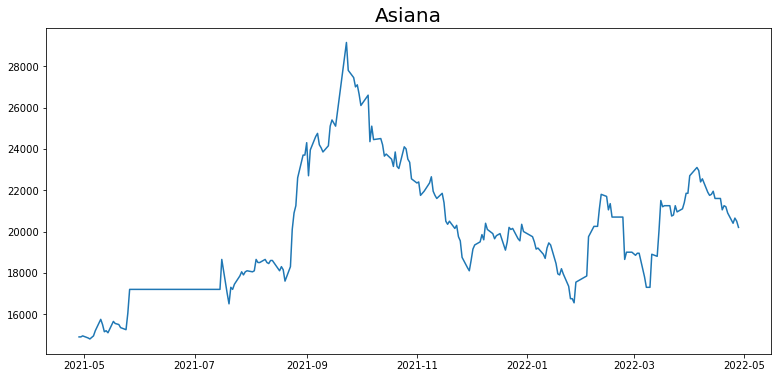

In [3]:
# 그래프 그려서 확인
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 13, 6   
plt.plot(ts_asiana)
plt.title('Asiana',fontsize = 20)

#### 2) 신세계 그래프

Text(0.5, 1.0, 'SSG')

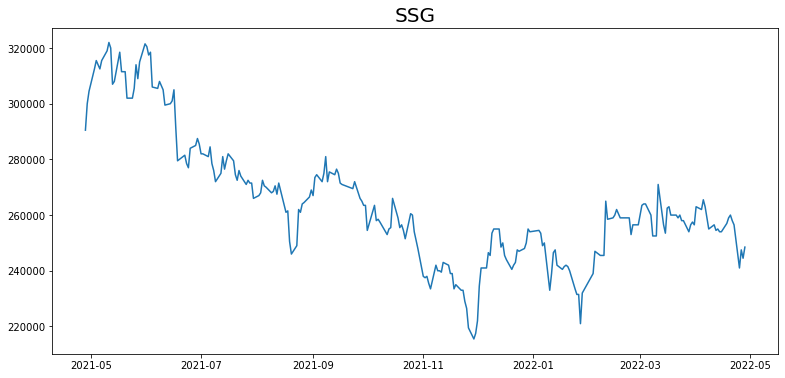

In [4]:
rcParams['figure.figsize'] = 13, 6  
plt.plot(ts_ssg)
plt.title('SSG',fontsize = 20)

#### 3) 한화 그래프

Text(0.5, 1.0, 'Hanwha')

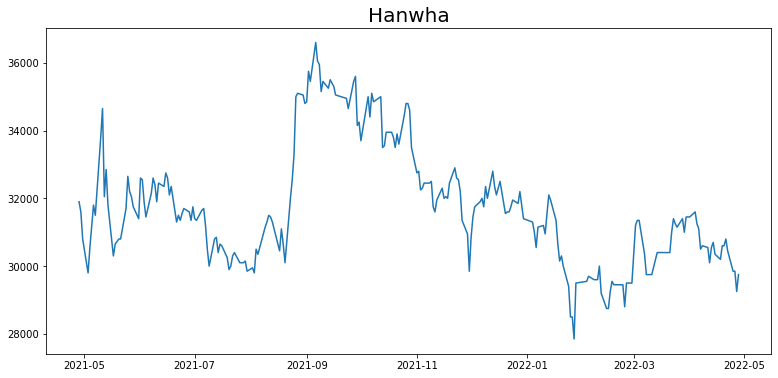

In [5]:
rcParams['figure.figsize'] = 13, 6 
plt.plot(ts_hanwha)
plt.title('Hanwha',fontsize = 20)

# 2. 전처리

- null값은 없음

In [6]:
# Null값 확인
ts_asiana=ts_asiana.interpolate(method='time') # 결측치 보간법
print(ts_asiana.isnull().sum())

ts_ssg=ts_ssg.interpolate(method='time')
print(ts_ssg.isnull().sum())

ts_hanwha=ts_hanwha.interpolate(method='time')
print(ts_hanwha.isnull().sum())

# ts_asiana[ts_asiana.isna()]

0
0
0


# 3. 로그 변환 여부확인
- 그래프를 그려서 시각적으로 보고 비정상성과 정상성 여부를 확인하는 것은 부정확할 수 있다고 생각된다.  
  또한, 나는 시계열의 그래프를 보고서 어떤 부분에서 비정상성을 가지고 있는지 파악을 하지 못한다.  
  그렇기 때문에 시각적으로 판단하는 것을 제외하고 통계적인 수치 비교를 통해 정상성 여부를 확인하고자 한다.
  
- adfuller를 통해 기존 데이터의 값과 로그를 씌운 데이터의 p-value를 비교해 로그변환이 필요한지 확인

In [7]:
from statsmodels.tsa.stattools import adfuller
# statsmodels 패키지에서 제공하는 adfuller 메서드를 호출

# 측정 함수 생성
def augmented_dickey_fuller_test(timeseries):
    
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 결과 출력
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print(dfoutput)

#### 1) 아시아나 데이터 로그 변환 여부 비교

In [8]:
ts_asiana_log = np.log(ts_asiana)
print(augmented_dickey_fuller_test(ts_asiana))
print('-'*50)
print(augmented_dickey_fuller_test(ts_asiana_log))

Results of Dickey-Fuller Test:
Test Statistic                  -2.086355
p-value                          0.250036
#Lags Used                       0.000000
Number of Observations Used    246.000000
dtype: float64
None
--------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -2.171683
p-value                          0.216683
#Lags Used                       0.000000
Number of Observations Used    246.000000
dtype: float64
None


P-value의 값이 0.25에서 0.21로 작아지는 것으로 보아 로그 변환을 통해 분산을 안정화하는 것이 더 바람직하다고 생각한다.

#### 2) 신세계 데이터 로그 변환 여부 비교

In [9]:
ts_ssg_log = np.log(ts_ssg)
print(augmented_dickey_fuller_test(ts_ssg))
print('-'*50)
print(augmented_dickey_fuller_test(ts_ssg_log))

Results of Dickey-Fuller Test:
Test Statistic                  -1.849753
p-value                          0.356055
#Lags Used                       0.000000
Number of Observations Used    246.000000
dtype: float64
None
--------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -1.912220
p-value                          0.326334
#Lags Used                       0.000000
Number of Observations Used    246.000000
dtype: float64
None


P-value의 값이 0.35에서 0.32로 작아지는 것으로 보아 로그 변환을 통해 분산을 안정화하는 것이 더 바람직하다고 생각한다.

#### 3) 한화 데이터 로그 변환 여부 비교

In [10]:
ts_hanwha_log = np.log(ts_hanwha)
print(augmented_dickey_fuller_test(ts_hanwha))
print('-'*50)
print(augmented_dickey_fuller_test(ts_hanwha_log))

Results of Dickey-Fuller Test:
Test Statistic                  -2.49735
p-value                          0.11612
#Lags Used                       0.00000
Number of Observations Used    246.00000
dtype: float64
None
--------------------------------------------------
Results of Dickey-Fuller Test:
Test Statistic                  -2.51883
p-value                          0.11096
#Lags Used                       0.00000
Number of Observations Used    246.00000
dtype: float64
None


- P-value의 값이 0.116에서 0.110로 미세하게 나마 작아지는 것으로 보아 로그 변환을 통해 분산을 안정화하는 것이 더 바람직하다고 생각한다.
- 해당 근거에 의해 3가지 시계열 데이터 모두 로그 변환을 하는 것이 정상성을 가지는데 도움을 준다고 생각된다.

# 4. 정상성 만족 여부 확인

- 정상성을 해치는 것은 trend와 seasonlity가 있다.   
  가져온 데이터가 trend값과 seasonality가 존재해 정상성을 해치는지 알아보고자   
  로그 변환한 데이터의 값과 이동평균을 통한 trend가 제거된 값, 차분을 통해 seasonality가 제거된 값을 비교해   
  해당 데이터에 추세 혹은 계절성이 있는지 수치(p-value)로 파악해보고자 한다.

In [11]:
# 함수 생성
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

#### 1) 아시아나 데이터 추세 변환 여부 비교

Results of Dickey-Fuller Test:
Test Statistic                  -4.482992
p-value                          0.000211
#Lags Used                       3.000000
Number of Observations Used    232.000000
dtype: float64
None


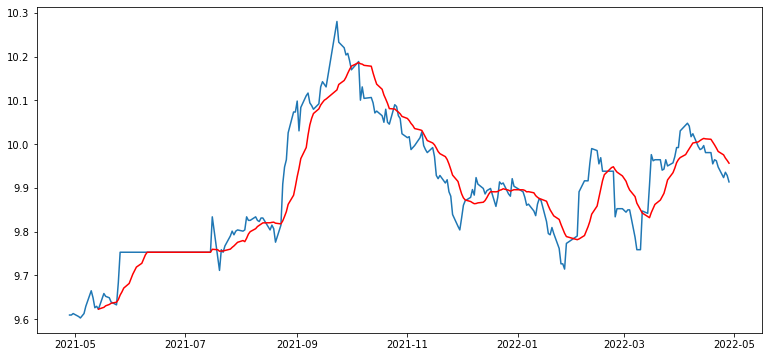

In [12]:
# 이동평균을 통한 trend제거
asiana_moving_avg = ts_asiana_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_asiana_log)
plt.plot(asiana_moving_avg, color='red')

ts_asiana_log_moving_avg = ts_asiana_log - asiana_moving_avg # 변화량 제거
ts_asiana_log_moving_avg.dropna(inplace=True) # 결측값 제거

print(augmented_dickey_fuller_test(ts_asiana_log_moving_avg))

이전 p-value의 값은 0.21에서 이동평균을 통한 추세를 제거한 p-value의 값은 0.0002로 감소하였다.  
해당 내용에 근거해 아시아나 시계열 데이터는 추세를 가지고 있다고 판단이 된다.

#### 2) 신세계 데이터 추세 변환 여부 비교

Results of Dickey-Fuller Test:
Test Statistic                  -3.726508
p-value                          0.003755
#Lags Used                      13.000000
Number of Observations Used    222.000000
dtype: float64
None


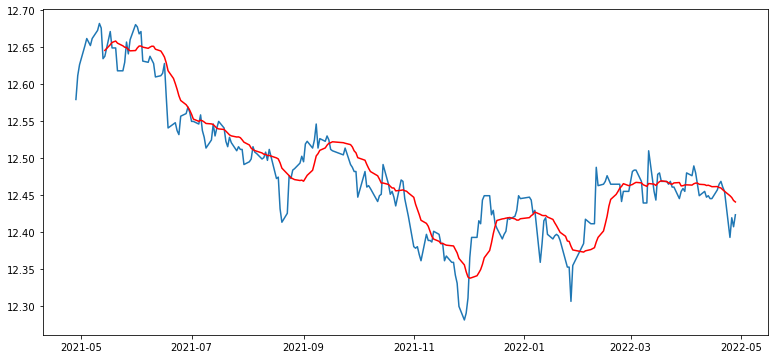

In [13]:
# 이동평균을 통한 trend제거
ssg_moving_avg = ts_ssg_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_ssg_log)
plt.plot(ssg_moving_avg, color='red')

ts_ssg_log_moving_avg = ts_ssg_log - ssg_moving_avg # 변화량 제거
ts_ssg_log_moving_avg.dropna(inplace=True) # 결측값 제거

print(augmented_dickey_fuller_test(ts_ssg_log_moving_avg))

이전 p-value의 값은 0.32에서 이동평균을 통한 추세를 제거한 p-value의 값은 0.00375로 감소하였다.  
해당 내용에 근거해 신세계 시계열 데이터는 추세를 가지고 있다고 판단이 된다.

#### 3) 한화 데이터 추세 변환 여부 비교

Results of Dickey-Fuller Test:
Test Statistic                  -5.398267
p-value                          0.000003
#Lags Used                       2.000000
Number of Observations Used    233.000000
dtype: float64
None


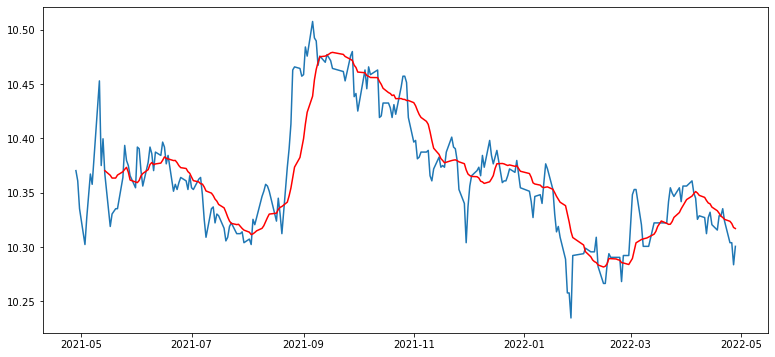

In [14]:
# 이동평균을 통한 trend제거
hanwha_moving_avg = ts_hanwha_log.rolling(window=12).mean()  # moving average구하기 
plt.plot(ts_hanwha_log)
plt.plot(hanwha_moving_avg, color='red')

ts_hanwha_log_moving_avg = ts_hanwha_log - hanwha_moving_avg # 변화량 제거
ts_hanwha_log_moving_avg.dropna(inplace=True) # 결측값 제거

print(augmented_dickey_fuller_test(ts_hanwha_log_moving_avg))

이전 p-value의 값은 0.11에서 이동평균을 통한 추세를 제거한 p-value의 값은 0.000003로 크게 감소하였다.  
해당 내용에 근거해 한화 시계열 데이터는 추세를 가지고 있다고 판단이 된다.

#### 1) 아시아나 데이터 계절성 변환 여부 비교

Results of Dickey-Fuller Test:
Test Statistic                -1.527384e+01
p-value                        4.677168e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
dtype: float64
None


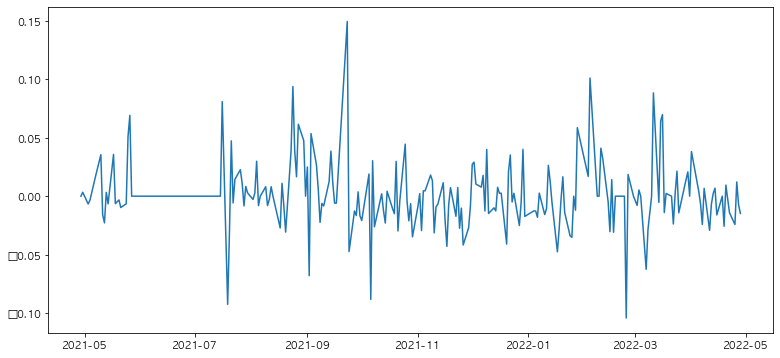

In [25]:
# 차분을 통한 seasonality 제거
ts_asiana_log_shift = ts_asiana_log.shift()
ts_asiana_log_diff = ts_asiana_log - ts_asiana_log_shift
ts_asiana_log_diff.dropna(inplace=True)
plt.plot(ts_asiana_log_diff)

print(augmented_dickey_fuller_test(ts_asiana_log_diff))

#### 2) 신세계 데이터 계절성 변환 여부 비교

Results of Dickey-Fuller Test:
Test Statistic                -1.697252e+01
p-value                        9.136608e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
dtype: float64
None


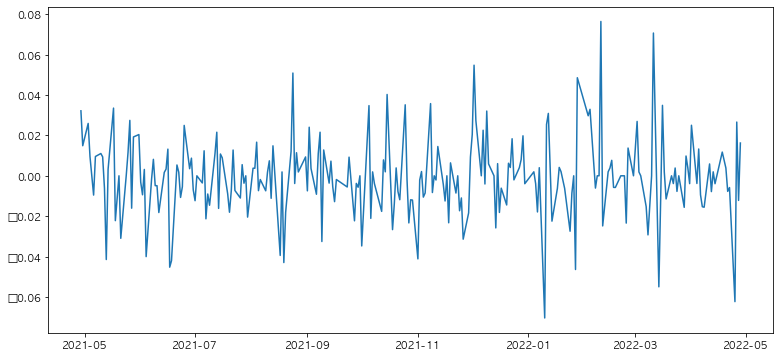

In [26]:
# 차분을 통한 seasonality 제거
ts_ssg_log_shift = ts_ssg_log.shift()
ts_ssg_log_diff = ts_ssg_log - ts_ssg_log_shift
ts_ssg_log_diff.dropna(inplace=True)
plt.plot(ts_ssg_log_diff)

print(augmented_dickey_fuller_test(ts_ssg_log_diff))

#### 3) 한화 데이터 계절성 변환 여부 비교

Results of Dickey-Fuller Test:
Test Statistic                -9.638370e+00
p-value                        1.544524e-16
#Lags Used                     3.000000e+00
Number of Observations Used    2.420000e+02
dtype: float64
None


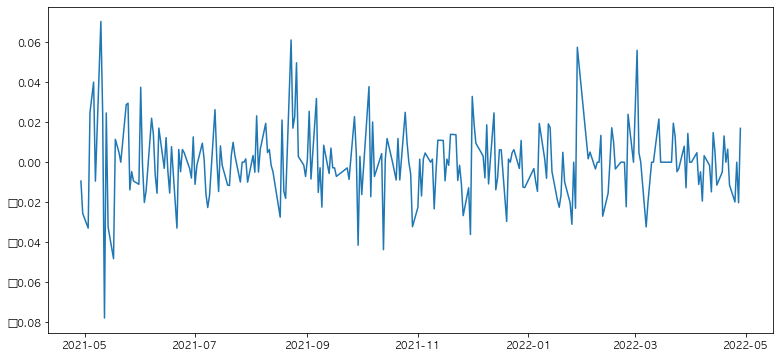

In [27]:
# 차분을 통한 seasonality 제거
ts_hanwha_log_shift = ts_hanwha_log.shift()
ts_hanwha_log_diff = ts_hanwha_log - ts_hanwha_log_shift
ts_hanwha_log_diff.dropna(inplace=True)
plt.plot(ts_hanwha_log_diff)

print(augmented_dickey_fuller_test(ts_hanwha_log_diff))

- 3기업 모두 차분을 통해 계절성을 제거한 값의 p-value를 비교해 보았을 떄, 모두 감소하는 것을 확인하였다.  
  다만, 각 데이터의 p-value값이 급격하게 감소하는 것으로 보아 반드시 계절성을 가진다고 판단하기에는 애매하다고 생각된다.
  추후 아래에서 진행되는 ARIMA 혹은 SARIMA 모델을 통해서 비교해 보겠다.

# 5. 시계열 안정성 분석

시계열 분해를 통해 해당 데이터의 trend와 seasonality를 확인 및 제거 하고 Residual를 통해 안정성을 확인한다.

#### 1) 아시아나 데이터 시계열 분해

Results of Dickey-Fuller Test:
Test Statistic                  -5.410526
p-value                          0.000003
#Lags Used                       4.000000
Number of Observations Used    212.000000
dtype: float64
None


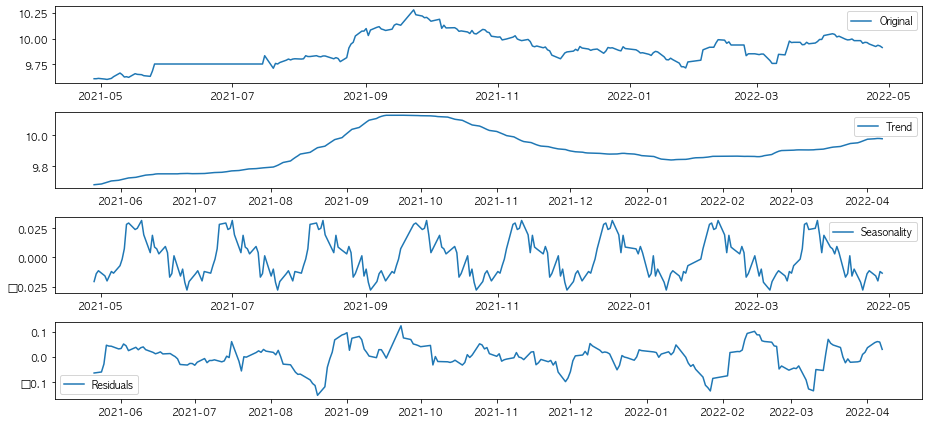

In [28]:
# additive :  Trend, Seasonal, Resid가 더해져서 해당 값을 구성한다고 가정
# multiplicative : Trend, Seasonal, Resid가 곱해져서 해당 값을 구성한다고 가정

# 아시아나

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_asiana_log, model='additive', period = 30) 
 
trend_asiana = decomposition.trend
seasonal_asiana = decomposition.seasonal
residual_asiana = decomposition.resid

plt.subplot(411)
plt.plot(ts_asiana_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_asiana, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_asiana,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_asiana, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

residual_asiana.dropna(inplace=True)
print(augmented_dickey_fuller_test(residual_asiana))

#### 2) 신세계 데이터 시계열 분해

Results of Dickey-Fuller Test:
Test Statistic                  -4.930106
p-value                          0.000030
#Lags Used                      13.000000
Number of Observations Used    203.000000
dtype: float64
None


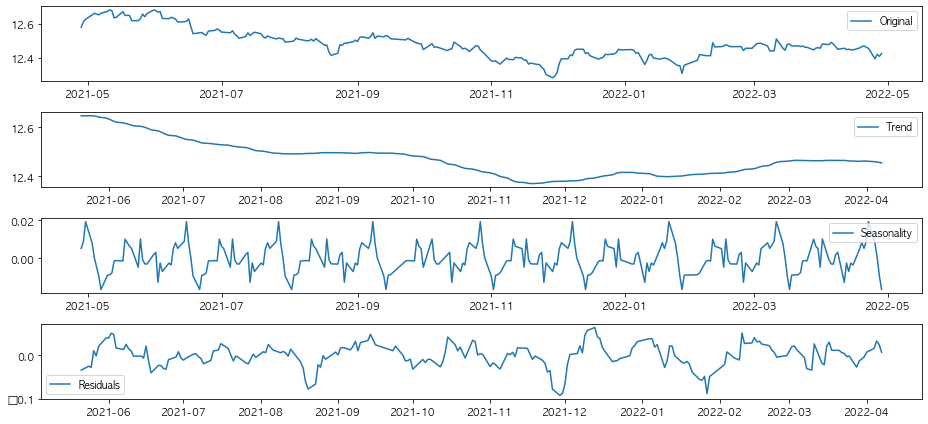

In [29]:
decomposition = seasonal_decompose(ts_ssg_log, model='additive', period = 30) 
 
trend_ssg = decomposition.trend
seasonal_ssg = decomposition.seasonal
residual_ssg = decomposition.resid

plt.subplot(411)
plt.plot(ts_ssg_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_ssg, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_ssg,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_ssg, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

residual_ssg.dropna(inplace=True)
print(augmented_dickey_fuller_test(residual_ssg))

#### 3) 한화 데이터 시계열 분해

Results of Dickey-Fuller Test:
Test Statistic                -6.319631e+00
p-value                        3.088928e-08
#Lags Used                     2.000000e+00
Number of Observations Used    2.140000e+02
dtype: float64
None


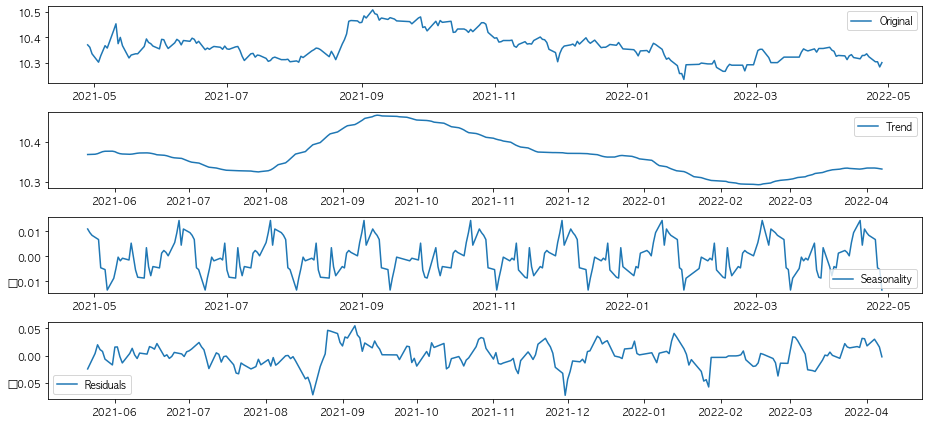

In [30]:
decomposition = seasonal_decompose(ts_hanwha_log, model='additive', period = 30) 
 
trend_hanwha = decomposition.trend
seasonal_hanwha = decomposition.seasonal
residual_hanwha = decomposition.resid

plt.subplot(411)
plt.plot(ts_hanwha_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend_hanwha, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal_hanwha,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual_hanwha, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

residual_hanwha.dropna(inplace=True)
print(augmented_dickey_fuller_test(residual_hanwha))

# 6. 데이터셋 분리

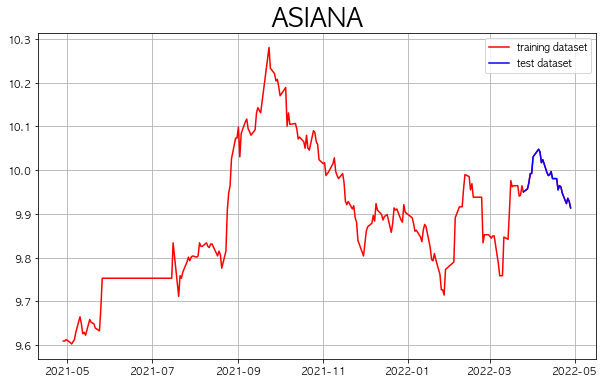

In [31]:
# 아시아나 데이터 분리
train_data_asiana, test_data_asiana = ts_asiana_log[:int(len(ts_asiana_log)*0.9)], ts_asiana_log[int(len(ts_asiana_log)*0.9):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_asiana_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_asiana, c='b', label='test dataset')
plt.title('ASIANA',fontsize = 25)
plt.legend()


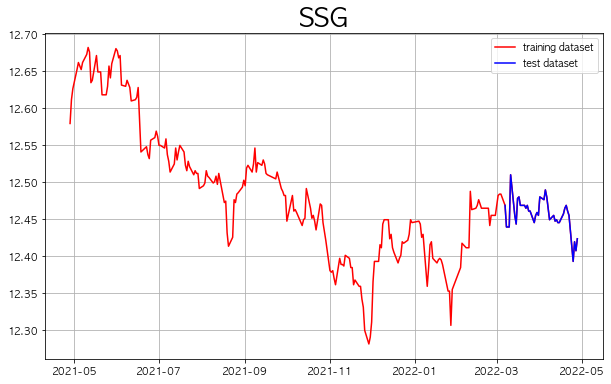

In [32]:
# 신세계 데이터 분리
train_data_ssg, test_data_ssg = ts_ssg_log[:int(len(ts_ssg_log)*0.85)], ts_ssg_log[int(len(ts_ssg_log)*0.85):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_ssg_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_ssg, c='b', label='test dataset')
plt.title('SSG',fontsize = 25)
plt.legend()


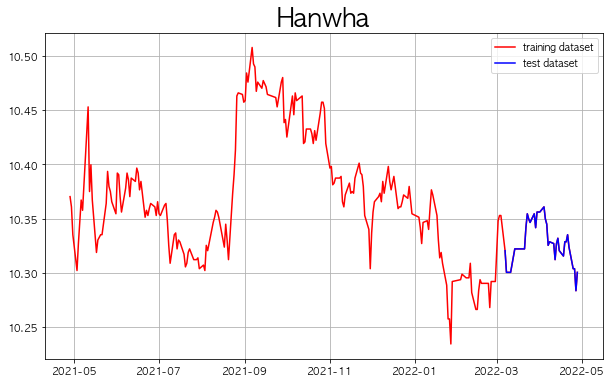

In [33]:
# 한화 데이터 분리
train_data_hanwha, test_data_hanwha = ts_hanwha_log[:int(len(ts_hanwha_log)*0.85)], ts_hanwha_log[int(len(ts_hanwha_log)*0.85):]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_hanwha_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_log를 선택
plt.plot(test_data_hanwha, c='b', label='test dataset')
plt.title('Hanwha',fontsize = 25)
plt.legend()


# 7. ARIMA 적정 모수 찾기
- 두 그래프 중 파란색 범위(절단점)에 들어가지 않는 데이터를 선택하는 것이 유의미하다.

In [34]:
# 한글 폰트 설정
import os
if os.name == 'posix':
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

ACF의 그래프가 점차 작아지는 모습을 보이면 비정상성을 가지고 있다고 한다.  
로그 변환한 값으로 ACF를 그리는데 비정상성을 가지고 있다면 추가적으로 차분 까지한 ACF까지 그려보려 한다.
  
보통 차분의 경우 1차 혹인 2차 까지만 진행되고 3차까지 하는 경우는 거의 없다고 한다.

#### 1) 아시아나 데이터 ACF / PACF 확인 

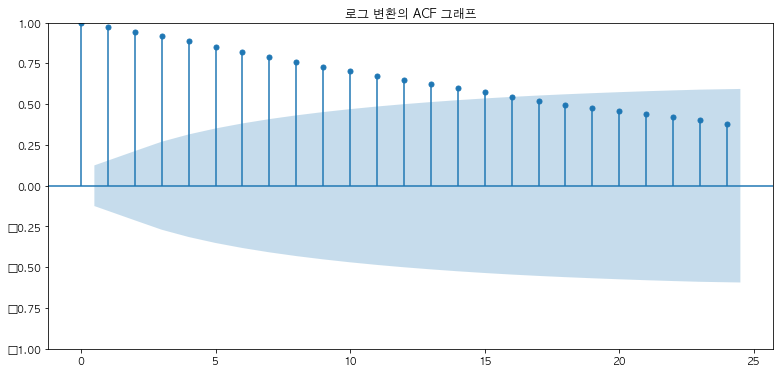

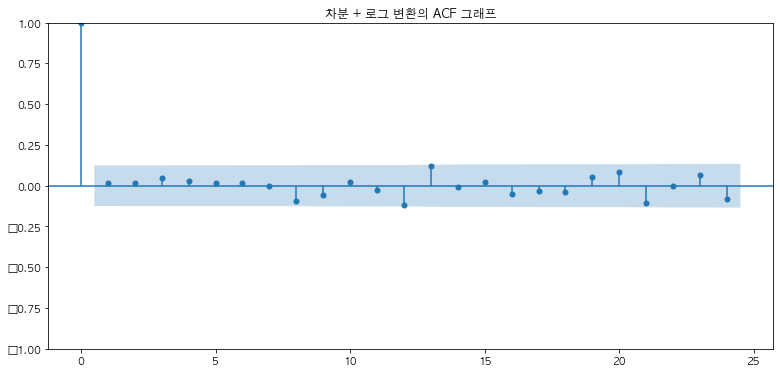

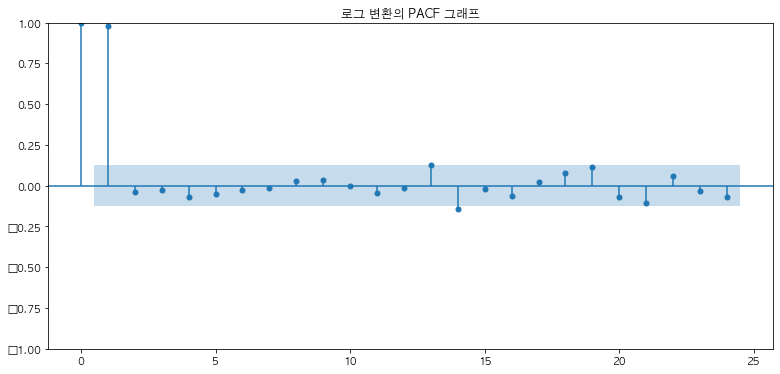

Results of Dickey-Fuller Test:
Test Statistic                -1.527384e+01
p-value                        4.677168e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
dtype: float64
None


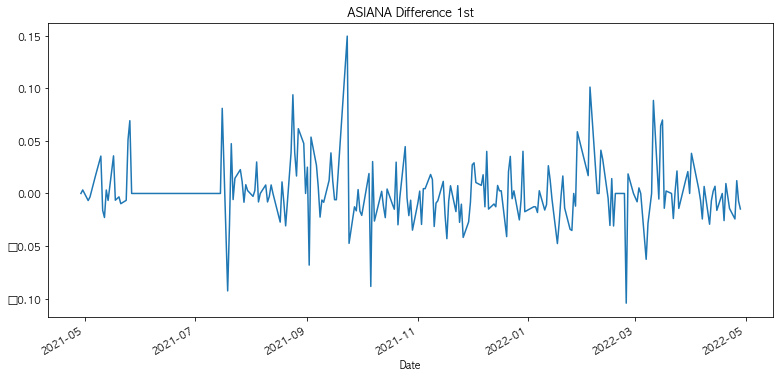

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF와 PACF를 통해 적정 모수 찾기
# 로그변환한 값의 ACF 그래프는 점차 작아지는 모습을 보이고 있어 비정상성을 가지고 있다.
# 따라서, 차분을 통해 정상성을 가지는 ACF그래프로 변환이 필요하다.
plot_acf(ts_asiana_log, title='로그 변환의 ACF 그래프') 
plot_acf(ts_asiana_log_diff, title='차분 + 로그 변환의 ACF 그래프')

plot_pacf(ts_asiana_log,title='로그 변환의 PACF 그래프') 
plt.show()

# 차분 안정성 찾기
diff_1_asiana = ts_asiana_log.diff(periods=1).iloc[1:]
diff_1_asiana.plot(title='ASIANA Difference 1st')

print(augmented_dickey_fuller_test(diff_1_asiana))

- 차분 전 ACF의 경우 0 ~ 15의 범위 까지의 숫자 모두 사용 가능하며, 차분 후 ACF는 0이 적당하다고 생각된다.
- PACF의 경우 0과 1이 가능하다.
- 1번의 차분만으로도 P-value값이 낮은 값으로 나온것으로 보아 I의 값은 1이라고 생각된다.

#### 2) 신세계 데이터 ACF / PACF 확인 

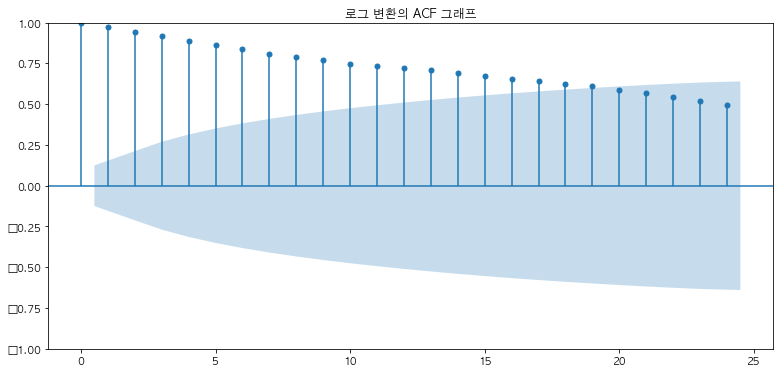

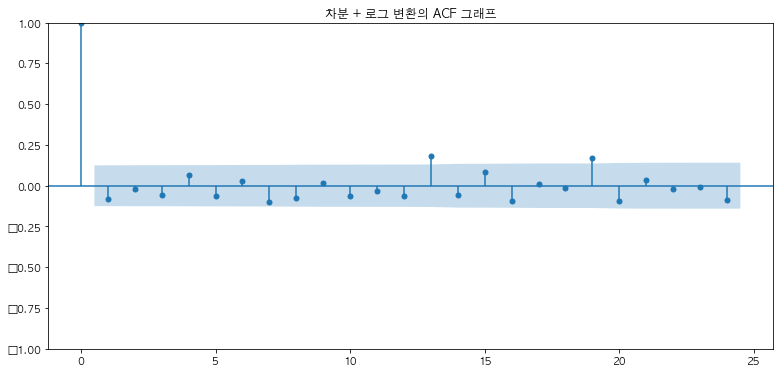

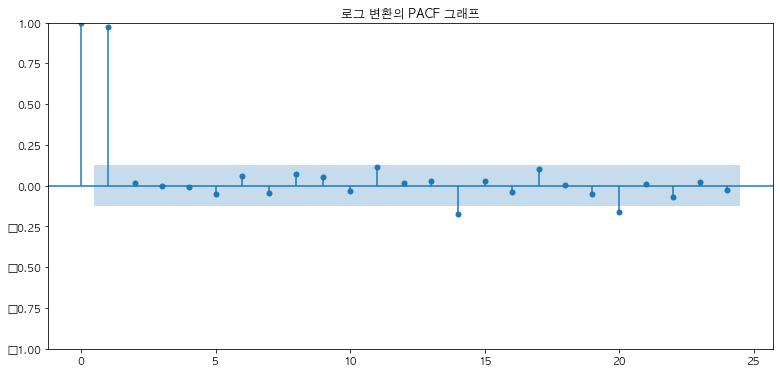

Results of Dickey-Fuller Test:
Test Statistic                -1.697252e+01
p-value                        9.136608e-30
#Lags Used                     0.000000e+00
Number of Observations Used    2.450000e+02
dtype: float64
None


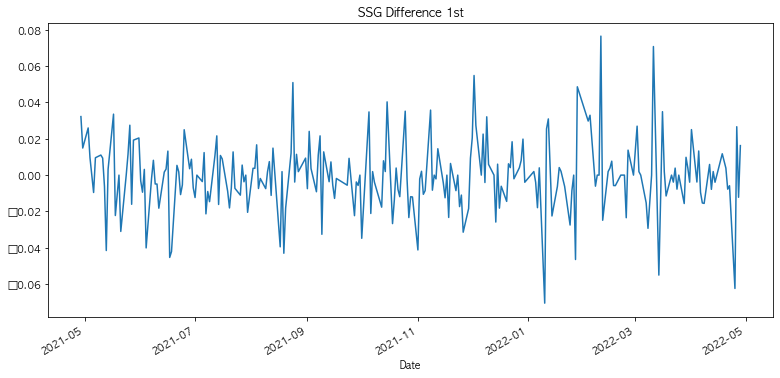

In [36]:
# ACF와 PACF를 통해 적정 모수 찾기
# 로그변환한 값의 ACF 그래프는 점차 작아지는 모습을 보이고 있어 비정상성을 가지고 있다.
# 따라서, 차분을 통해 정상성을 가지는 ACF그래프로 변환이 필요하다.
plot_acf(ts_ssg_log,title='로그 변환의 ACF 그래프') 
plot_acf(ts_ssg_log_diff,title='차분 + 로그 변환의 ACF 그래프') 
plot_pacf(ts_ssg_log,title='로그 변환의 PACF 그래프') 
plt.show()

# 차분 안정성 찾기
diff_1_ssg = ts_ssg_log.diff(periods=1).iloc[1:]
diff_1_ssg.plot(title='SSG Difference 1st')

print(augmented_dickey_fuller_test(diff_1_ssg))

- 차분 전 ACF의 경우 0 ~ 18의 범위 까지의 숫자 모두 사용 가능하며, 차분 후 ACF는 0이 적당하다고 생각된다.
- PACF의 경우 0과 1이 가능하다.
- 1번의 차분만으로도 P-value값이 낮은 값으로 나온것으로 보아 I의 값은 1이라고 생각된다.

#### 3) 한화 데이터 ACF / PACF 확인 

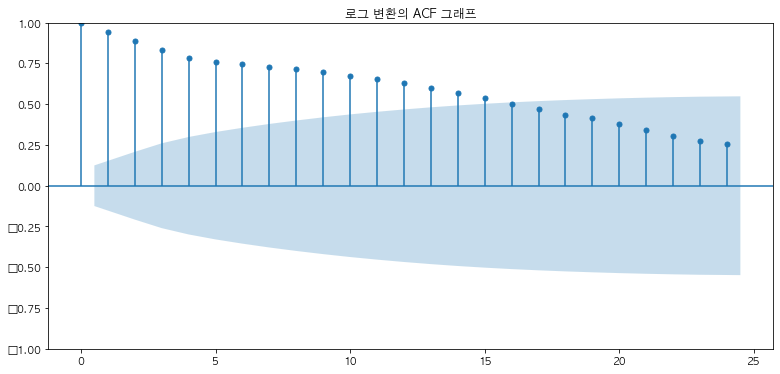

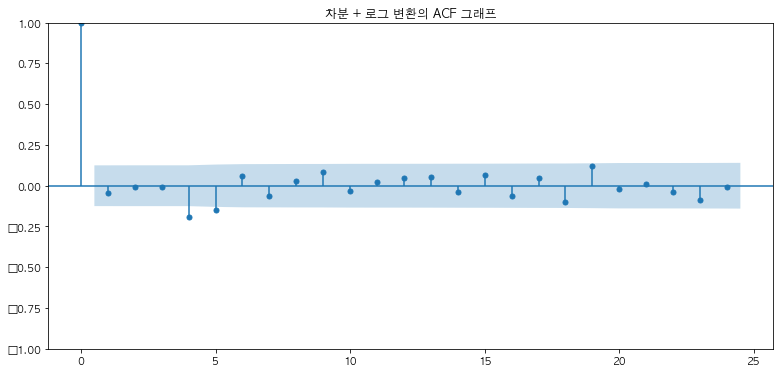

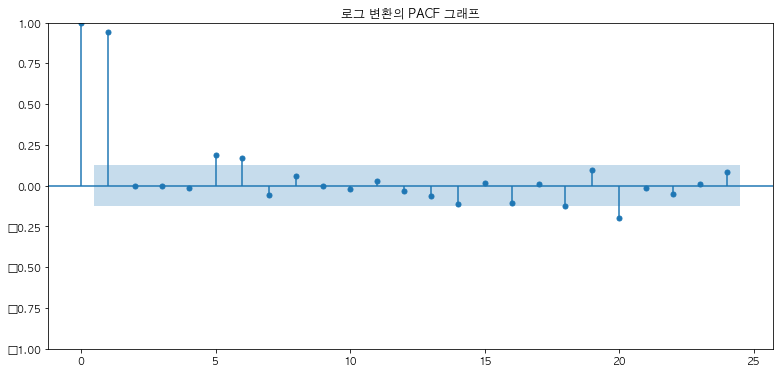

Results of Dickey-Fuller Test:
Test Statistic                -9.638370e+00
p-value                        1.544524e-16
#Lags Used                     3.000000e+00
Number of Observations Used    2.420000e+02
dtype: float64
None


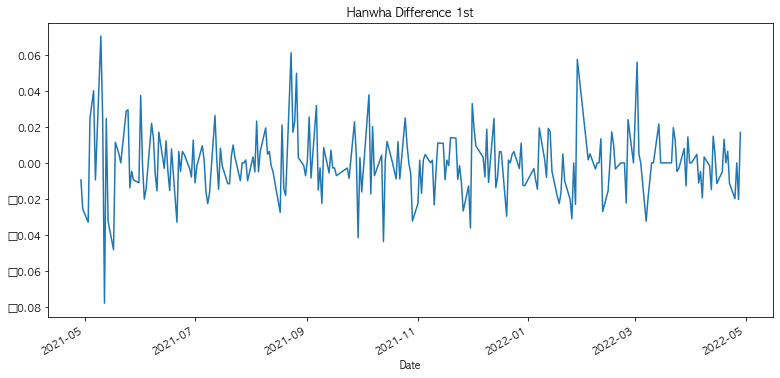

In [37]:
# ACF와 PACF를 통해 적정 모수 찾기
plot_acf(ts_hanwha_log,title='로그 변환의 ACF 그래프') 
plot_acf(ts_hanwha_log_diff,title='차분 + 로그 변환의 ACF 그래프') 
plot_pacf(ts_hanwha_log,title='로그 변환의 PACF 그래프') 
plt.show()

# 차분 안정성 찾기
diff_1_hanwha = ts_hanwha_log.diff(periods=1).iloc[1:]
diff_1_hanwha.plot(title='Hanwha Difference 1st')

print(augmented_dickey_fuller_test(diff_1_hanwha))

- 차분 전 ACF의 경우 0 ~ 15의 범위 까지의 숫자 모두 사용 가능하며, 차분 후 ACF는 0이 적당하다고 생각된다.
- PACF의 경우 0과 1이 가능하다.
- 1번의 차분만으로도 P-value값이 낮은 값으로 나온것으로 보아 I의 값은 1이라고 생각된다.

# 8. Auto_ARIMA를 통한 최적의 파라미터 찾기

- ARIMA 모델 훈련을 위한 최적의 (p,d,g) 값을 찾아야 하나 일일이 비교 확인하는 방법 보다는 auto_arima를 통해 최적의 값을 찾은 후 직접 대입하는 방법으로 풀어보고자 한다.
  
- auto_arima에 들어가는 (p,d,g)값의 범위는 7번 테스트에서 로그 변환만 한 ACF와 PACF의 범위값을 사용하고자 한다.
- 위에서 PACF의 경우 범위값이 0 또는 1로 측정이되어 기본 값인 start_q = 2 / max_q = 5 / start_Q = 1 / max_Q = 2 를 사용하고자 한다.
- 해당 데이터의 계절성 값인 m의 값은 분기별로 계절성이 있다고 가정하여 4를 적용한고자 한다.
- (P,D,Q,m)는 계절성이 있는 SARIMA에서 사용되는 값이며, SARIMA의 값을 입력핼 때, 보통의 경우 auto arima가 뽑아낸 (p,d,g)의 값을 그대로 사용한다고 한다.

#### 1) 아시아나 데이터 최적의 파라미터 찾기

In [92]:
from sklearn.model_selection import train_test_split
from pmdarima.arima import auto_arima
# 데이터 분리
train_asiana, test_asiana = train_test_split(ts_asiana_log, test_size=0.2, shuffle=False)
# auto_arima를 통한 최적의 파라미터 찾기
model_asiana = auto_arima(ts_asiana_log, max_p=18, d=1, # start_q = 2 / max_q = 5 / start_Q = 1 / max_Q = 2 디폴트값 사용
                   seasonal=True, max_P=18, D=1, m=4,
                   trace=True, error_action='ignore', suppress_warnings=True, stepwise=False
                  )

 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-878.323, Time=0.08 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=inf, Time=0.23 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=inf, Time=0.71 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=-927.683, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=inf, Time=0.38 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=-947.288, Time=0.04 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.40 sec
 ARIMA(0,1,0)(2,1,2)[4]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=-964.553, Time=0.30 sec
 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=1.07 sec
 ARIMA(0,1,0)(3,1,2)[4]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,0)(4,1,0)[4]             : AIC=-985.984, Time=0.37 sec
 ARIMA(0,1,0)(4,1,1)[4]             : AIC=inf, Time=0.85 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=-985.888, Time=0.46 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-876.363, Tim

아시아나 데이터의 경우 auto_arima가 측정한 최적의 값은 (0,1,0)의 결과값을 가진다.  
윗 부분에서 해당 데이터가 계절성을 가지고 있음을 확인하였다. (0,1,0)[4]의 값을 SARIMA에 넣고 log likehood값과 AIC 값의 비교를 통해 최적의 값을 찾고자 한다.

#### 2) 신세계 데이터 최적의 파라미터 찾기

In [65]:
train_ssg, test_ssg = train_test_split(ts_ssg_log, test_size=0.2, shuffle=False)

model_ssg = auto_arima(ts_ssg_log, max_p=18, d=1, # start_q = 2 / max_q = 5 / start_Q = 1 / max_Q = 2 디폴트값 사용
                   seasonal=True, max_P=18, D=1, m=4,
                   trace=True, error_action='ignore', suppress_warnings=True, stepwise=False
                  )

 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-1072.308, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=-1114.604, Time=0.03 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=inf, Time=0.53 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=-1136.901, Time=0.12 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.58 sec
 ARIMA(0,1,0)(2,1,2)[4]             : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=-1144.287, Time=0.13 sec
 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(3,1,2)[4]             : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(4,1,0)[4]             : AIC=-1149.548, Time=0.34 sec
 ARIMA(0,1,0)(4,1,1)[4]             : AIC=inf, Time=1.71 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=-1153.381, Time=0.39 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-1070.4

아시아나 데이터의 경우 auto_arima가 측정한 최적의 값은 (1,1,0)의 결과값을 가진다.  
윗 부분에서 해당 데이터가 계절성을 가지고 있음을 확인하였다. (1,1,0)[4]의 값을 SARIMA에 넣고 log likehood값과 AIC 값의 비교를 통해 최적의 값을 찾고자 한다.

#### 3) 한화 데이터 최적의 파라미터 찾기

In [139]:
train_hanwha, test_hanwha = train_test_split(ts_hanwha_log, test_size=0.2, shuffle=False)

model_hanwha = auto_arima(ts_hanwha_log, max_p=15, d=1, # start_q = 2 / max_q = 5 / start_Q = 1 / max_Q = 2 디폴트값 사용
                   seasonal=True, max_P=15, D=1, m=4,
                   trace=True, error_action='ignore', suppress_warnings=True, stepwise=False
                  )

 ARIMA(0,1,0)(0,1,0)[4]             : AIC=-1044.834, Time=0.04 sec
 ARIMA(0,1,0)(0,1,1)[4]             : AIC=inf, Time=0.60 sec
 ARIMA(0,1,0)(0,1,2)[4]             : AIC=inf, Time=0.47 sec
 ARIMA(0,1,0)(1,1,0)[4]             : AIC=-1148.526, Time=0.10 sec
 ARIMA(0,1,0)(1,1,1)[4]             : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(1,1,2)[4]             : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(2,1,0)[4]             : AIC=-1187.896, Time=0.27 sec
 ARIMA(0,1,0)(2,1,1)[4]             : AIC=inf, Time=0.63 sec
 ARIMA(0,1,0)(2,1,2)[4]             : AIC=inf, Time=0.79 sec
 ARIMA(0,1,0)(3,1,0)[4]             : AIC=-1194.925, Time=0.18 sec
 ARIMA(0,1,0)(3,1,1)[4]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(3,1,2)[4]             : AIC=inf, Time=0.98 sec
 ARIMA(0,1,0)(4,1,0)[4]             : AIC=-1199.885, Time=0.39 sec
 ARIMA(0,1,0)(4,1,1)[4]             : AIC=inf, Time=1.30 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=-1205.362, Time=0.83 sec
 ARIMA(0,1,1)(0,1,0)[4]             : AIC=-1042.9

아시아나 데이터의 경우 auto_arima가 측정한 최적의 값은 (1,1,0)의 결과값을 가진다.  
윗 부분에서 해당 데이터가 계절성을 가지고 있음을 확인하였다. (1,1,0)[4]의 값을 SARIMA에 넣고 log likehood값과 AIC 값의 비교를 통해 최적의 값을 찾고자 한다.

# 9.ARIMA 모델훈련 과 테스트
- 모델에 (p,d,q)의 값을 넣고 log likehood와 AIC의 수치를 보고 최적의 파라미터를 판별하고자 한다.
- log likehood는 정확도를 뜻하며 값이 커질수록 좋다.
- AIC는 통계 모델의 상대적인 품질을 평가하는 기준으로 값이 작을 수록 좋다.  
  why? AIC = -2ln(L) +2k이다.  
  2ln(L)는 모형의 적합도이며, L은 likehood function을 의미한다 / k는 모형의 추정된 파라미터의 개수이다.   
  따라서, AIC의 값이 낮다는 것은 모델의 적합도가 높다는 것이다.

#### 1) 아시아나 데이터 모델 훈련 및 테스트 값 비교

##### - ARIMA 모델 

In [39]:
import warnings
warnings.filterwarnings('ignore') #경고 무시

from statsmodels.tsa.arima.model import ARIMA

# 모델 생성
model_asiana = ARIMA(train_data_asiana, order=(0, 1, 0,)) 
fitted_m_asiana = model_asiana.fit() 

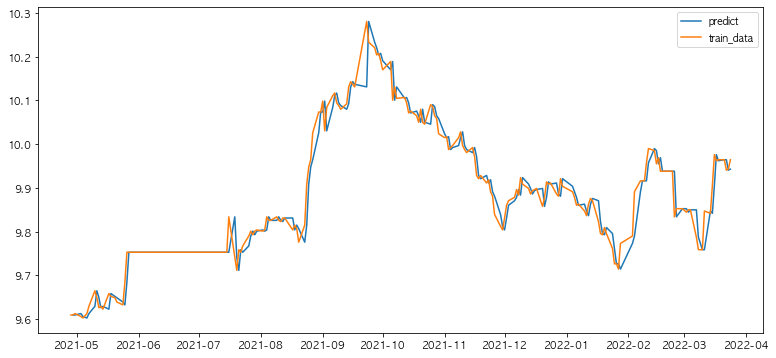

In [40]:
fitted_m_asiana_df = fitted_m_asiana.predict()
fitted_m2_asiana = fitted_m_asiana_df.drop(fitted_m_asiana_df.index[0])
plt.plot(fitted_m2_asiana, label='predict')
plt.plot(train_data_asiana, label='train_data')
plt.legend()

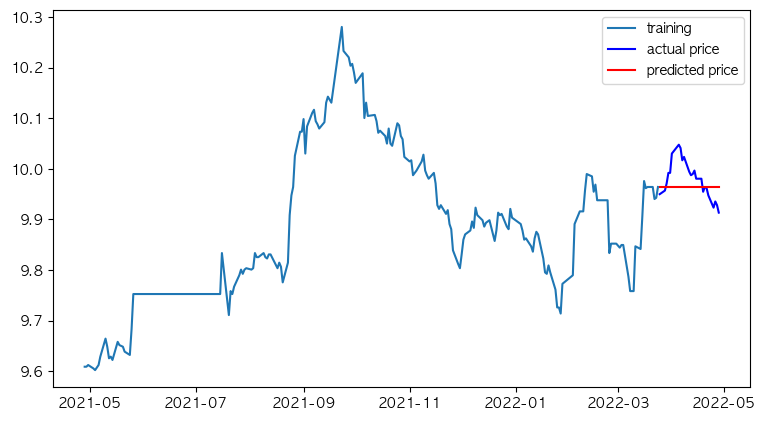

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  222
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 468.676
Date:                Wed, 04 May 2022   AIC                           -935.352
Time:                        23:32:14   BIC                           -931.954
Sample:                             0   HQIC                          -933.980
                                - 222                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0008   4.27e-05     19.717      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               242.45
Prob(Q):                              0.78   Pr

In [41]:
model_asiana = ARIMA(train_data_asiana, order=(0, 1, 0))
fitted_m_asiana = model_asiana.fit() 
fc_asiana= fitted_m_asiana.forecast(len(test_data_asiana), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_asiana = pd.Series(fc_asiana.values, index=test_data_asiana.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_asiana, label='training')
plt.plot(test_data_asiana, c='b', label='actual price')
plt.plot(fc_series_asiana, c='r',label='predicted price')
plt.legend()
plt.show()

print(fitted_m_asiana.summary())

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data_asiana), np.exp(fc_asiana.values))
print('ASIANA MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_asiana), np.exp(fc_asiana.values))
print('ASIANA MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_asiana), np.exp(fc_asiana.values)))
print('ASIANA RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_asiana.values) - np.exp(test_data_asiana))/np.abs(np.exp(test_data_asiana)))
print('ASIANA MAPE: {:.2f}%'.format(mape*100))

ASIANA MSE:  798700.0
ASIANA MAE:  718.0000000000015
ASIANA RMSE:  893.7001734362593
ASIANA MAPE: 3.27%


##### - SARIMA 모델 

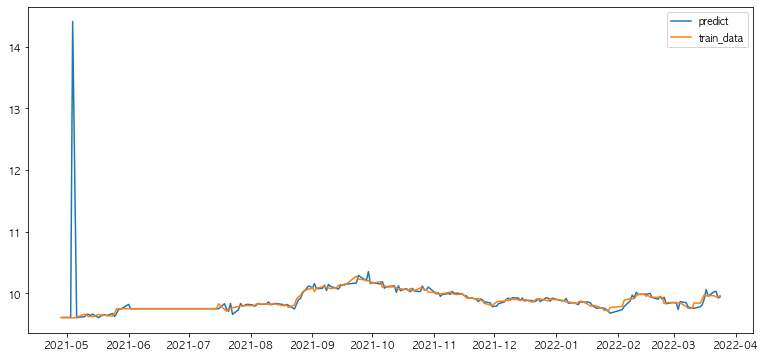

In [43]:
# 모델 생성
model_asiana_seasonal = ARIMA(train_data_asiana, order=(0, 1, 0,), seasonal_order=(0,1,0,4)) # 계절성 값 추가 입력
fitted_m_asiana_seasonal = model_asiana_seasonal.fit() 

fitted_m_asiana__seasonal_df = fitted_m_asiana_seasonal.predict()
fitted_m2_asiana_seasonal = fitted_m_asiana__seasonal_df.drop(fitted_m_asiana_df.index[0])
plt.plot(fitted_m2_asiana_seasonal, label='predict')
plt.plot(train_data_asiana, label='train_data')
plt.legend()

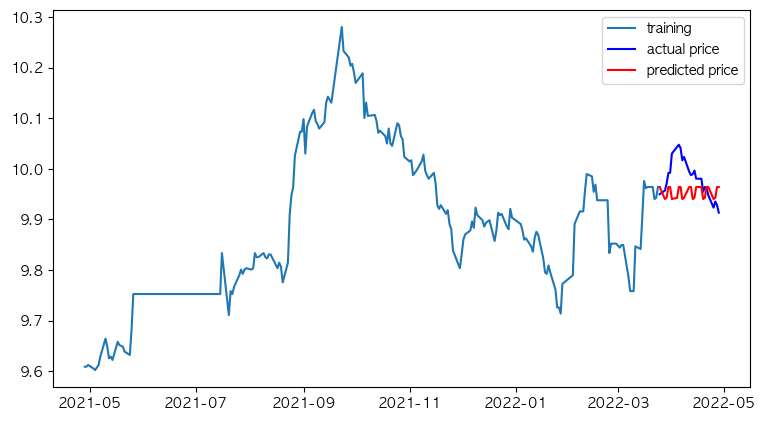

                                    SARIMAX Results                                    
Dep. Variable:                           Close   No. Observations:                  222
Model:             ARIMA(0, 1, 0)x(0, 1, 0, 4)   Log Likelihood                 385.806
Date:                         Wed, 04 May 2022   AIC                           -769.613
Time:                                 23:32:20   BIC                           -766.233
Sample:                                      0   HQIC                          -768.247
                                         - 222                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0017      0.000     13.337      0.000       0.001       0.002
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (J

In [44]:
model_asiana_seasonal = ARIMA(train_data_asiana, order=(0, 1, 0), seasonal_order=(0,1,0,4))
fitted_m_asiana_seasonal = model_asiana_seasonal.fit() 
fc_asiana_seasonal= fitted_m_asiana_seasonal.forecast(len(test_data_asiana), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_asiana_seasonal = pd.Series(fc_asiana_seasonal.values, index=test_data_asiana.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_asiana, label='training')
plt.plot(test_data_asiana, c='b', label='actual price')
plt.plot(fc_series_asiana_seasonal, c='r',label='predicted price')
plt.legend()
plt.show()

print(fitted_m_asiana_seasonal.summary())

In [45]:
mse = mean_squared_error(np.exp(test_data_asiana), np.exp(fc_asiana_seasonal.values))
print('ASIANA MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_asiana), np.exp(fc_asiana_seasonal.values))
print('ASIANA MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_asiana), np.exp(fc_asiana_seasonal.values)))
print('ASIANA RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_asiana_seasonal.values) - np.exp(test_data_asiana))/np.abs(np.exp(test_data_asiana)))
print('ASIANA MAPE: {:.2f}%'.format(mape*100))

ASIANA MSE:  1104099.8246511498
ASIANA MAE:  841.9999532114603
ASIANA RMSE:  1050.7615450953417
ASIANA MAPE: 3.82%


##### - auto arima가 뽑아낸 계절성의 값을 넣어 비교

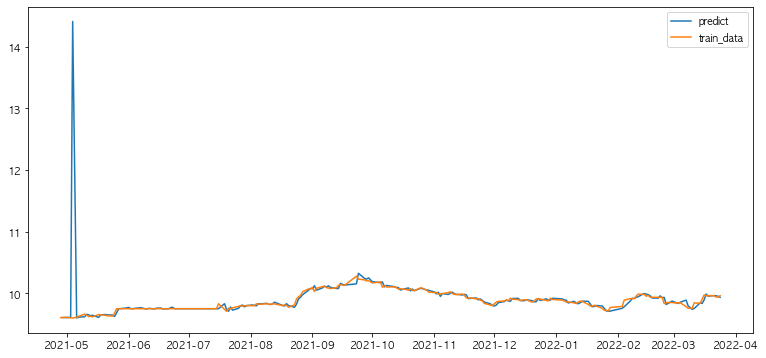

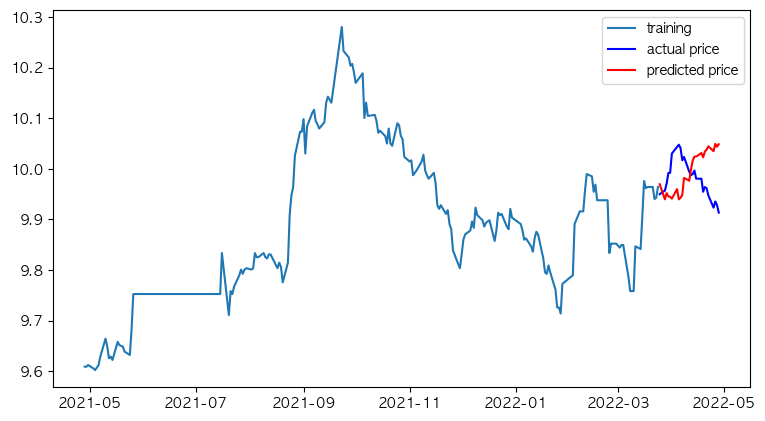

                                    SARIMAX Results                                    
Dep. Variable:                           Close   No. Observations:                  222
Model:             ARIMA(0, 1, 0)x(4, 1, 0, 4)   Log Likelihood                 439.323
Date:                         Wed, 04 May 2022   AIC                           -868.646
Time:                                 23:32:30   BIC                           -851.747
Sample:                                      0   HQIC                          -861.819
                                         - 222                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4       -0.7453      0.072    -10.422      0.000      -0.885      -0.605
ar.S.L8       -0.6019      0.062     -9.724      0.000     

In [46]:
# 모델 생성
model_asiana_seasonal = ARIMA(train_data_asiana, order=(0, 1, 0,), seasonal_order=(4,1,0,4)) # 계절성 값 추가 입력
fitted_m_asiana_seasonal = model_asiana_seasonal.fit() 

fitted_m_asiana__seasonal_df = fitted_m_asiana_seasonal.predict()
fitted_m2_asiana_seasonal = fitted_m_asiana__seasonal_df.drop(fitted_m_asiana_df.index[0])
plt.plot(fitted_m2_asiana_seasonal, label='predict')
plt.plot(train_data_asiana, label='train_data')
plt.legend()

model_asiana_seasonal = ARIMA(train_data_asiana, order=(0, 1, 0), seasonal_order=(4,1,0,4))
fitted_m_asiana_seasonal = model_asiana_seasonal.fit() 
fc_asiana_seasonal= fitted_m_asiana_seasonal.forecast(len(test_data_asiana), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_asiana_seasonal = pd.Series(fc_asiana_seasonal.values, index=test_data_asiana.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_asiana, label='training')
plt.plot(test_data_asiana, c='b', label='actual price')
plt.plot(fc_series_asiana_seasonal, c='r',label='predicted price')
plt.legend()
plt.show()

print(fitted_m_asiana_seasonal.summary())

In [47]:
mse = mean_squared_error(np.exp(test_data_asiana), np.exp(fc_asiana_seasonal.values))
print('ASIANA MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_asiana), np.exp(fc_asiana_seasonal.values))
print('ASIANA MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_asiana), np.exp(fc_asiana_seasonal.values)))
print('ASIANA RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_asiana_seasonal.values) - np.exp(test_data_asiana))/np.abs(np.exp(test_data_asiana)))
print('ASIANA MAPE: {:.2f}%'.format(mape*100))

ASIANA MSE:  2586615.964713805
ASIANA MAE:  1397.6988447238443
ASIANA RMSE:  1608.2959816880116
ASIANA MAPE: 6.50%


--------

- ARIMA의 결과 log likehood = 486.676 / AIC = -935.352 / MAPE = 3.27%

- SARIMA의 결과 log likehood = 385.806 / AIC = -769.613 / MAPE = 3.82%
  
- auto arima가 뽑아낸 SARIMA의 결과 log likehood = 439.323 / AIC = -868.646 / MAPE = 6.50%  

- Log likehood의 값의 감소와 AIC의 증가하였으며, MAPE의 값이 소폭 증가하였다.
- 더불어 SARIMA의 모델 사용 시 예측값에 이상치로 보이는 점도 발견 되었다.
- auto arima가 뽑아낸 SARIMA의 값으로 측정한 결과 결과값이 더 부정확하게 되었다.
- 결과적으로 asiana 데이터의 경우 SARIMA 데이터 보다 계절성을 제외한 ARIMA 데이터로 예측하는 것이 더 바람직하다고 생각한다.

----------

#### 2) 신세계 데이터 모델 훈련 및 테스트 값 비교

##### - ARIMA 모델

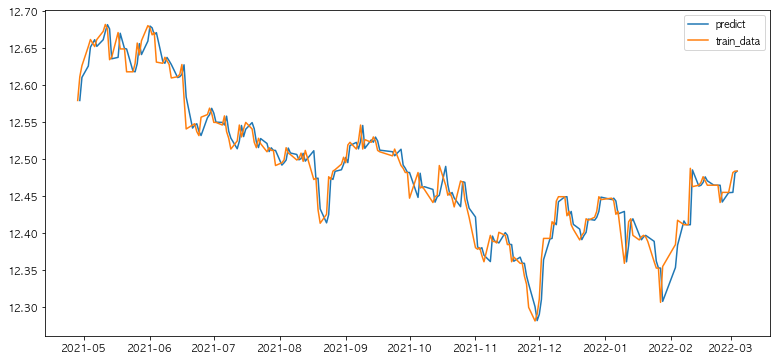

In [51]:
# 모델 생성
model_ssg = ARIMA(train_data_ssg, order=(1, 1, 0)) 
fitted_m_ssg = model_ssg.fit() 

fitted_m_ssg_df = fitted_m_ssg.predict()
fitted_m2_ssg = fitted_m_ssg_df.drop(fitted_m_ssg_df.index[0])
plt.plot(fitted_m2_ssg, label='predict')
plt.plot(train_data_ssg, label='train_data')
plt.legend()

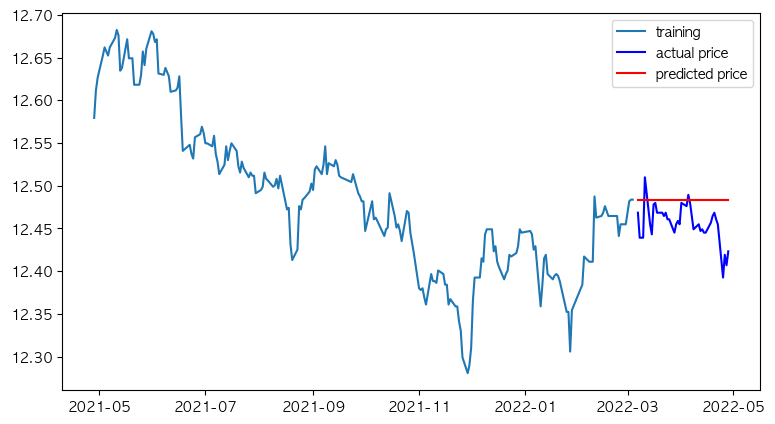

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  209
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 529.089
Date:                Wed, 04 May 2022   AIC                          -1054.177
Time:                        23:38:17   BIC                          -1047.502
Sample:                             0   HQIC                         -1051.478
                                - 209                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0289      0.064     -0.452      0.651      -0.154       0.096
sigma2         0.0004   2.52e-05     14.362      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [52]:
model_ssg = ARIMA(train_data_ssg, order=(1, 1, 0))  
fitted_m_ssg = model_ssg.fit() 
fc_ssg= fitted_m_ssg.forecast(len(test_data_ssg), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_ssg = pd.Series(fc_ssg.values, index=test_data_ssg.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_ssg, label='training')
plt.plot(test_data_ssg, c='b', label='actual price')
plt.plot(fc_series_ssg, c='r',label='predicted price')
plt.legend()
plt.show()

print(fitted_m_ssg.summary())

In [53]:
mse = mean_squared_error(np.exp(test_data_ssg), np.exp(fc_ssg.values))
print('SSG MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_ssg), np.exp(fc_ssg.values))
print('SSG MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_ssg), np.exp(fc_ssg.values)))
print('SSG RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_ssg.values) - np.exp(test_data_ssg))/np.abs(np.exp(test_data_ssg)))
print('SSG MAPE: {:.2f}%'.format(mape*100))

SSG MSE:  80124999.99999878
SSG MAE:  7486.842105263056
SSG RMSE:  8951.25689498401
SSG MAPE: 2.95%


##### - SARIMA 모델

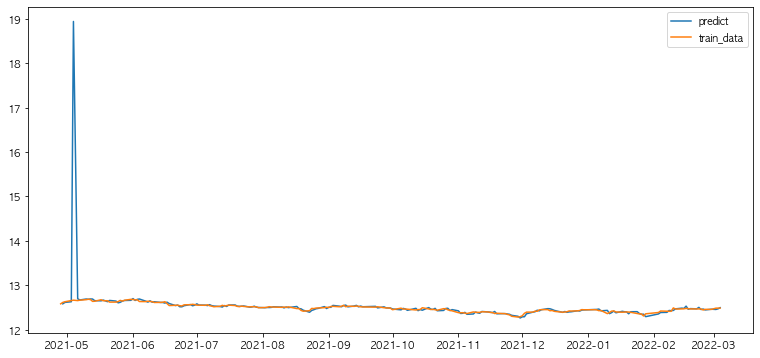

In [54]:
# 모델 생성
model_ssg_seasonal = ARIMA(train_data_ssg, order=(1,1,0), seasonal_order=(1,1,0,4)) 
fitted_m_ssg_seasonal = model_ssg_seasonal.fit() 

fitted_m_ssg_seasonal_df = fitted_m_ssg_seasonal.predict()
fitted_m2_ssg_seasonal = fitted_m_ssg_seasonal_df.drop(fitted_m_ssg_df.index[0])
plt.plot(fitted_m2_ssg_seasonal, label='predict')
plt.plot(train_data_ssg, label='train_data')
plt.legend()

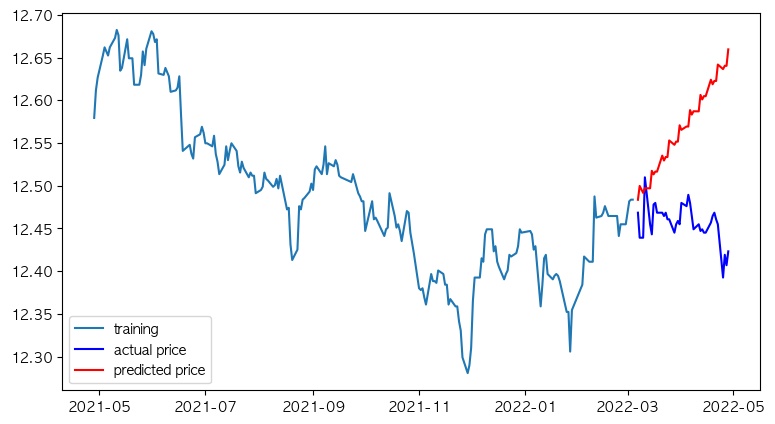

                                    SARIMAX Results                                    
Dep. Variable:                           Close   No. Observations:                  209
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 4)   Log Likelihood                 473.823
Date:                         Wed, 04 May 2022   AIC                           -941.645
Time:                                 23:38:22   BIC                           -931.691
Sample:                                      0   HQIC                          -937.619
                                         - 209                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0181      0.070      0.259      0.795      -0.119       0.155
ar.S.L4       -0.3972      0.059     -6.778      0.000     

In [55]:
model_ssg_seasonal = ARIMA(train_data_ssg, order=(1,1,0), seasonal_order=(1,1,0,4))
fitted_m_ssg_seasonal = model_ssg_seasonal.fit() 
fc_ssg_seasonal= fitted_m_ssg_seasonal.forecast(len(test_data_ssg), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_ssg_seasonal = pd.Series(fc_ssg_seasonal.values, index=test_data_ssg.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_ssg, label='training')
plt.plot(test_data_ssg, c='b', label='actual price')
plt.plot(fc_series_ssg_seasonal, c='r',label='predicted price')
plt.legend()
plt.show()

print(fitted_m_ssg_seasonal.summary())

In [56]:
mse = mean_squared_error(np.exp(test_data_ssg), np.exp(fc_ssg_seasonal.values))
print('ASIANA MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_ssg), np.exp(fc_ssg_seasonal.values))
print('ASIANA MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_ssg), np.exp(fc_ssg_seasonal.values)))
print('ASIANA RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_ssg_seasonal.values) - np.exp(test_data_ssg))/np.abs(np.exp(test_data_ssg)))
print('ASIANA MAPE: {:.2f}%'.format(mape*100))

ASIANA MSE:  1256180638.1558247
ASIANA MAE:  31006.31839378907
ASIANA RMSE:  35442.63870193393
ASIANA MAPE: 12.17%


##### - auto arima가 뽑아낸 계절성의 값을 넣어 비교

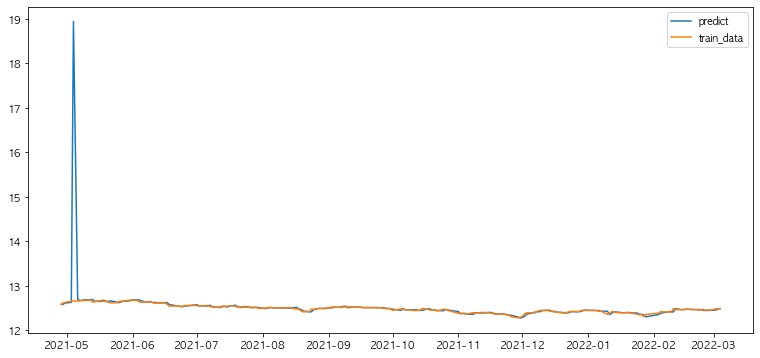

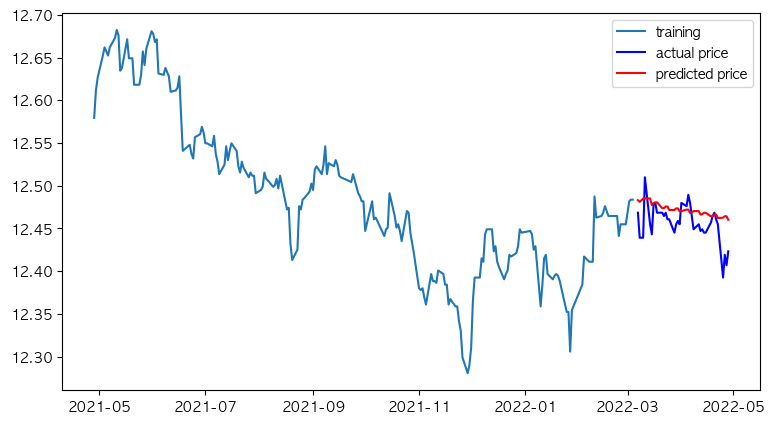

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  209
Model:             ARIMA(1, 1, 0)x(3, 1, [1], 4)   Log Likelihood                 512.576
Date:                           Wed, 04 May 2022   AIC                          -1013.153
Time:                                   23:38:35   BIC                           -993.244
Sample:                                        0   HQIC                         -1005.099
                                           - 209                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0101      0.066     -0.154      0.878      -0.139       0.119
ar.S.L4        0.0783      0.081      0.966

In [57]:
# 모델 생성
model_ssg_seasonal = ARIMA(train_data_ssg, order=(1,1,0), seasonal_order=(3,1,1,4)) 
fitted_m_ssg_seasonal = model_ssg_seasonal.fit() 

fitted_m_ssg_seasonal_df = fitted_m_ssg_seasonal.predict()
fitted_m2_ssg_seasonal = fitted_m_ssg_seasonal_df.drop(fitted_m_ssg_df.index[0])
plt.plot(fitted_m2_ssg_seasonal, label='predict')
plt.plot(train_data_ssg, label='train_data')
plt.legend()

model_ssg_seasonal = ARIMA(train_data_ssg, order=(1,1,0), seasonal_order=(3,1,1,4))
fitted_m_ssg_seasonal = model_ssg_seasonal.fit() 
fc_ssg_seasonal= fitted_m_ssg_seasonal.forecast(len(test_data_ssg), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_ssg_seasonal = pd.Series(fc_ssg_seasonal.values, index=test_data_ssg.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_ssg, label='training')
plt.plot(test_data_ssg, c='b', label='actual price')
plt.plot(fc_series_ssg_seasonal, c='r',label='predicted price')
plt.legend()
plt.show()

print(fitted_m_ssg_seasonal.summary())

In [58]:
mse = mean_squared_error(np.exp(test_data_ssg), np.exp(fc_ssg_seasonal.values))
print('ASIANA MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_ssg), np.exp(fc_ssg_seasonal.values))
print('ASIANA MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_ssg), np.exp(fc_ssg_seasonal.values)))
print('ASIANA RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_ssg_seasonal.values) - np.exp(test_data_ssg))/np.abs(np.exp(test_data_ssg)))
print('ASIANA MAPE: {:.2f}%'.format(mape*100))

ASIANA MSE:  40578273.001686394
ASIANA MAE:  4919.266050056073
ASIANA RMSE:  6370.107770021352
ASIANA MAPE: 1.94%


------------

- ARIMA의 결과 log likehood = 529.089 / AIC = -1054.177 / MAPE = 2.95%

- SARIMA의 결과 log likehood = 473.823 / AIC = -941.645 / MAPE = 12.17%
  
- auto arima가 뽑아낸 SARIMA의 결과 log likehood = 512.576 / AIC = -1013.153 / MAPE = 1.94%  

- log likehood의 값이 작아지고, AIC의 값이 커지며 MAPE의 값이 약 6배 증가하였다.
- SARIMA의 모델 사용 시 예측값에 이상치로 보이는 점도 발견 되었다.
- 현재의 시계열 데이터에서는 auto arima가 뽑아낸 SARIMA의 결과가 가장 적합하다.

------------

#### 3) 한화 데이터 모델 훈련 및 테스트 값 비교

##### - ARIMA 모델

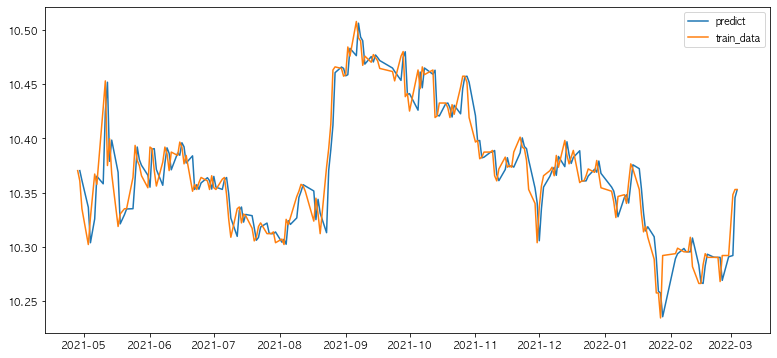

In [59]:
# 모델 생성
model_hanwha = ARIMA(train_data_hanwha, order=(1, 1, 0)) 
fitted_m_hanwha = model_hanwha.fit() 

fitted_m_hanwha_df = fitted_m_hanwha.predict()
fitted_m2_hanwha = fitted_m_hanwha_df.drop(fitted_m_hanwha_df.index[0])
plt.plot(fitted_m2_hanwha, label='predict')
plt.plot(train_data_hanwha, label='train_data')
plt.legend()

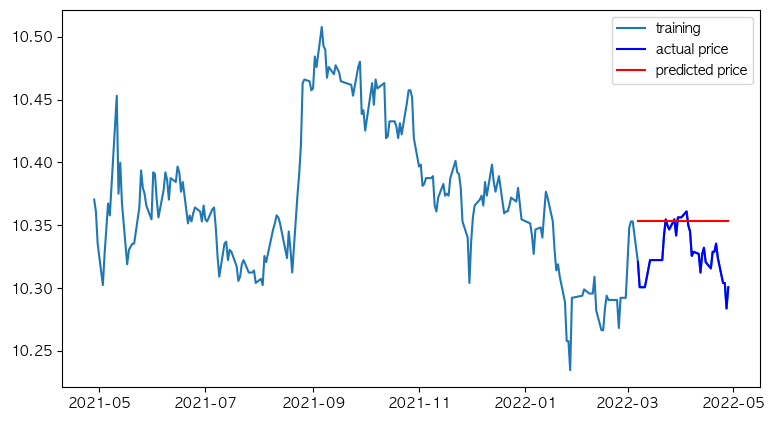

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  209
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 530.284
Date:                Wed, 04 May 2022   AIC                          -1056.568
Time:                        23:43:25   BIC                          -1049.893
Sample:                             0   HQIC                         -1053.869
                                - 209                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0498      0.065     -0.770      0.441      -0.177       0.077
sigma2         0.0004   2.44e-05     14.653      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [60]:
model_hanwha = ARIMA(train_data_hanwha, order=(1, 1, 0))  
fitted_m_hanwha = model_hanwha.fit() 
fc_hanwha= fitted_m_hanwha.forecast(len(test_data_hanwha), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_hanwha = pd.Series(fc_hanwha.values, index=test_data_hanwha.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(ts_hanwha_log, label='training')
plt.plot(test_data_hanwha, c='b', label='actual price')
plt.plot(fc_series_hanwha, c='r',label='predicted price')
plt.legend()
plt.show()

# 모델링 데이터 요약
print(fitted_m_hanwha.summary())

In [61]:
mse = mean_squared_error(np.exp(test_data_hanwha), np.exp(fc_hanwha.values))
print('Hanwha MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_hanwha), np.exp(fc_hanwha.values))
print('Hanwha MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_hanwha), np.exp(fc_hanwha.values)))
print('Hanwha RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_hanwha.values) - np.exp(test_data_hanwha))/np.abs(np.exp(test_data_hanwha)))
print('Hanwha MAPE: {:.2f}%'.format(mape*100))

Hanwha MSE:  924736.8421052322
Hanwha MAE:  799.9999999999853
Hanwha RMSE:  961.632384076801
Hanwha MAPE: 2.65%


##### - SARIMA 모델 

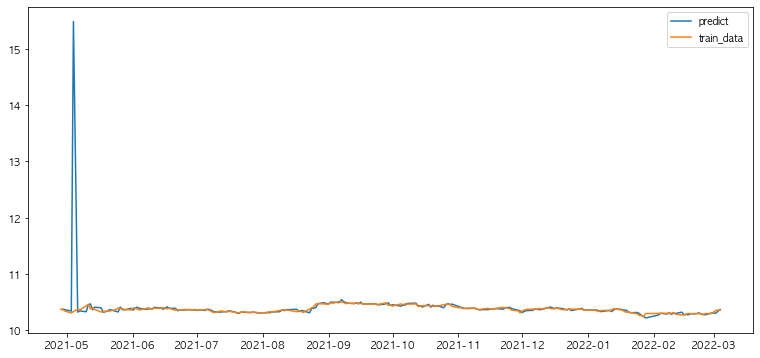

In [62]:
# 모델 생성
model_hanwha_seasonal = ARIMA(train_data_hanwha, order=(1, 1, 0),seasonal_order=(1,1,0,4)) 
fitted_m_hanwha_seasonal = model_hanwha_seasonal.fit() 

fitted_m_hanwha_seasonal_df = fitted_m_hanwha_seasonal.predict()
fitted_m2_hanwha_seasonal = fitted_m_hanwha_seasonal_df.drop(fitted_m_hanwha_seasonal_df.index[0])
plt.plot(fitted_m2_hanwha_seasonal, label='predict')
plt.plot(train_data_hanwha, label='train_data')
plt.legend()

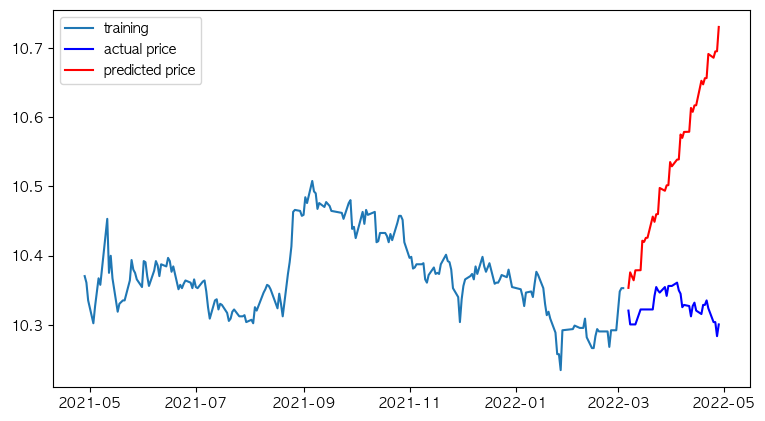

                                    SARIMAX Results                                    
Dep. Variable:                           Close   No. Observations:                  209
Model:             ARIMA(1, 1, 0)x(1, 1, 0, 4)   Log Likelihood                 478.199
Date:                         Wed, 04 May 2022   AIC                           -950.398
Time:                                 23:43:27   BIC                           -940.444
Sample:                                      0   HQIC                          -946.372
                                         - 209                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0427      0.066     -0.646      0.518      -0.172       0.087
ar.S.L4       -0.5996      0.041    -14.529      0.000     

In [63]:
model_hanwha_seasonal = ARIMA(train_data_hanwha, order=(1, 1, 0),seasonal_order=(1,1,0,4)) 
fitted_m_hanwha_seasonal = model_hanwha_seasonal.fit() 
fc_hanwha_seasonal= fitted_m_hanwha_seasonal.forecast(len(test_data_hanwha), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_hanwha_seasonal = pd.Series(fc_hanwha_seasonal.values, index=test_data_hanwha.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_hanwha, label='training')
plt.plot(test_data_hanwha, c='b', label='actual price')
plt.plot(fc_series_hanwha_seasonal, c='r',label='predicted price')
plt.legend()
plt.show()

# 모델링 데이터 요약
print(fitted_m_hanwha_seasonal.summary())

In [64]:
mse = mean_squared_error(np.exp(test_data_hanwha), np.exp(fc_hanwha_seasonal.values))
print('Hanwha MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_hanwha), np.exp(fc_hanwha_seasonal.values))
print('Hanwha MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_hanwha), np.exp(fc_hanwha_seasonal.values)))
print('Hanwha RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_hanwha_seasonal.values) - np.exp(test_data_hanwha))/np.abs(np.exp(test_data_hanwha)))
print('Hanwha MAPE: {:.2f}%'.format(mape*100))

Hanwha MSE:  70833261.69271404
Hanwha MAE:  7283.771108664517
Hanwha RMSE:  8416.249859213665
Hanwha MAPE: 23.91%


##### - auto arima가 뽑아낸 계절성의 값을 넣어 비교

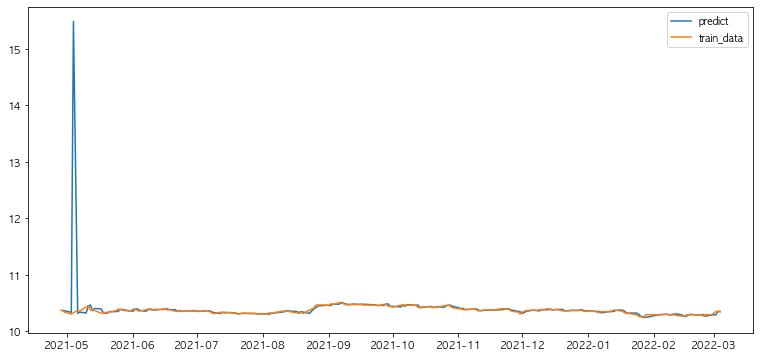

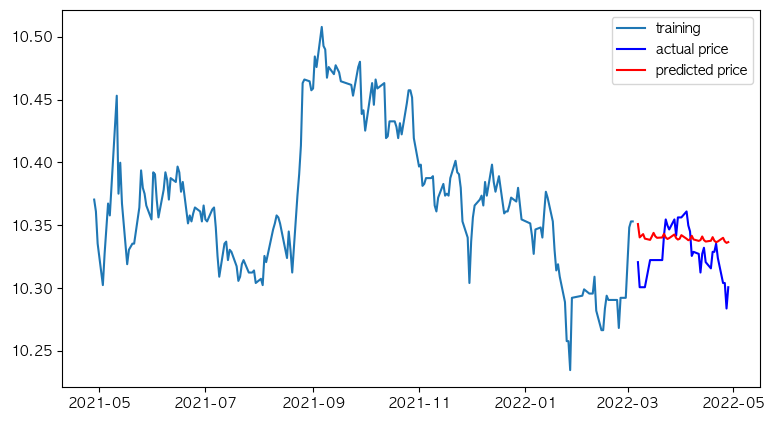

                                     SARIMAX Results                                     
Dep. Variable:                             Close   No. Observations:                  209
Model:             ARIMA(1, 1, 0)x(2, 1, [1], 4)   Log Likelihood                 515.381
Date:                           Wed, 04 May 2022   AIC                          -1020.763
Time:                                   23:44:39   BIC                          -1004.172
Sample:                                        0   HQIC                         -1014.051
                                           - 209                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0800      0.069     -1.162      0.245      -0.215       0.055
ar.S.L4       -0.2043      0.076     -2.671

In [65]:
# 모델 생성
model_hanwha_seasonal = ARIMA(train_data_hanwha, order=(1, 1, 0),seasonal_order=(2,1,1,4)) 
fitted_m_hanwha_seasonal = model_hanwha_seasonal.fit() 

fitted_m_hanwha_seasonal_df = fitted_m_hanwha_seasonal.predict()
fitted_m2_hanwha_seasonal = fitted_m_hanwha_seasonal_df.drop(fitted_m_hanwha_seasonal_df.index[0])
plt.plot(fitted_m2_hanwha_seasonal, label='predict')
plt.plot(train_data_hanwha, label='train_data')
plt.legend()

model_hanwha_seasonal = ARIMA(train_data_hanwha, order=(1, 1, 0),seasonal_order=(2,1,1,4)) 
fitted_m_hanwha_seasonal = model_hanwha_seasonal.fit() 
fc_hanwha_seasonal= fitted_m_hanwha_seasonal.forecast(len(test_data_hanwha), alpha=0.05)  # 95% conf

# 판다스 시리즈로 만들기
fc_series_hanwha_seasonal = pd.Series(fc_hanwha_seasonal.values, index=test_data_hanwha.index)   # 예측결과

# 시각화
plt.figure(figsize=(9,5), dpi=100)
plt.plot(train_data_hanwha, label='training')
plt.plot(test_data_hanwha, c='b', label='actual price')
plt.plot(fc_series_hanwha_seasonal, c='r',label='predicted price')
plt.legend()
plt.show()

# 모델링 데이터 요약
print(fitted_m_hanwha_seasonal.summary())

In [66]:
mse = mean_squared_error(np.exp(test_data_hanwha), np.exp(fc_hanwha_seasonal.values))
print('Hanwha MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data_hanwha), np.exp(fc_hanwha_seasonal.values))
print('Hanwha MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data_hanwha), np.exp(fc_hanwha_seasonal.values)))
print('Hanwha RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc_hanwha_seasonal.values) - np.exp(test_data_hanwha))/np.abs(np.exp(test_data_hanwha)))
print('Hanwha MAPE: {:.2f}%'.format(mape*100))

Hanwha MSE:  458267.6393618989
Hanwha MAE:  572.5762365763319
Hanwha RMSE:  676.9546804342953
Hanwha MAPE: 1.89%


-----------

- ARIMA의 결과 log likehood = 530.284 / AIC = -1056.568 / MAPE = 2.65%

- SARIMA의 결과 log likehood = 478.199 / AIC = -950.398 / MAPE = 23.91%

- auto arima가 뽑아낸 SARIMA의 결과 log likehood = 515.381 / AIC = -1020.763 / MAPE = 1.89%  

- log likehood의 값이 감소하고, AIC의 값은 커졌으며, MAPE의 값이 약 11배이상 증가하였다.
- 또한 SARIMA의 모델 사용 시 예측값에 이상치로 보이는 점도 발견 되었다.
- 현재의 시계열 데이터는 auto arima가 뽑아낸 SARIMA의 값이 가장 적합하다.

---------

# 최종결론

- 3사의 주식 데이터를 불러와 '종가'를 기준으로 데이터의 정상성 여부를 비교해보고 ARIMA모델과 SARIMA를 활용해 주가 예측을 진행해보았다.

- 각 회사별 MAPE의 값은 **3.27% / 1.94% / 1.89%**  로 낮은 오차율을 보이고 있다.

# 회고
- 앞단에서 p-value값을 통해 로그 변환, trend, seasonality의 여부를 비교해 보았고, auto_arima를 통한 최적의 파라미터 값을 찾아 보았다.  
  seasonality를 p-value로 비교했을 때, 값이 급격하게 작아지는 것이 처음엔 긍정적인 부분이라고 생각하였으나   
  ARIMA와 SAIRMA를 비교하면서 p-value의 값이 작아지는 부분이 긍정적인 부분이 아닌 오류일 수 있다고 생각이 들었다. 
- SARIMA의 데이터값이 전반적으로 ARIMA의 값보다 낮게 측정된 이유에 대해서 고민해 보자면 
  1번) 계절성이 없는 데이터이거나, 2번) 계절성의 값인 m의 값이 잘못 측정되었을 가능성이 있을 수 있다고 생각이 들었다.
  
- SARIMA의 예측값을 그래프로 그렸을 때, 데이터의 앞부분에서 이상치가 발견되었으나 이유를 찾지 못하였다.
- 시계열 exploration을 진행하면서 한 강의를 접했고, 해당 강의에서는 auto arima에서 뽑아냈을 때, (p,d,q)와 (P,D,Q,m)에서 m값만 제외하고 동일하게 값을 넣는 것이 대부분의 경우라고 하였다.  
  하지만 위 3개의 데이터를 보면 auto arima가 뽑아낸 SARIMA의 값을 넣었을 때, 2개의 데이터에서 더 적합한 것을 볼 수 있었다.  
  일일이 넣어보고 최적의 값을 찾는것이 더 옳겠지만, 이론적으로 어떤 값을 넣는지에 대한 명확한 가이드라인을 알 수 없어 아쉬웠다.
- ACF를 보고 p값을 판별함에 있어서 절단점 안으로 들어가기 전의 값을 선택는 방식이 있었으며, 혹자는 절단점 위에 있는 점의 수를 세서 p값을 선정한다고도 한다.  
  해당 선택방법에 대한 명확한 정의(지식)이 없어서 값을 판별하는데 혼란스러웠다.